In [3]:
source_url = "https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv"

In [4]:
import pandas as pd
df = pd.read_csv(source_url)



In [5]:
##We convert the date string to the DateTime type and sort entries by date.
df.Date = pd.to_datetime(df.Date)
df = df.sort_values('Date').reset_index(drop=True)
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Mozambique,0,0,0
2,2020-01-22,Namibia,0,0,0
3,2020-01-22,Nepal,0,0,0
4,2020-01-22,Netherlands,0,0,0


In [6]:
#There are 67 entries for each country from 22 January 2020 to 28th March 2020.
df.Country.value_counts()


Kosovo                 76
US                     76
Czechia                76
Papua New Guinea       76
Cuba                   76
                       ..
Congo (Brazzaville)    76
Diamond Princess       76
Equatorial Guinea      76
Sri Lanka              76
Guinea-Bissau          76
Name: Country, Length: 184, dtype: int64

In [18]:
countries = ['US', 'Italy', 'Korea, South', 'China']

In [19]:
#Let’s do the math and calculate how many people are currently sick in a certain country.
df.loc[:, 'n_hospitalized'] = df.Confirmed - df.Recovered - df.Deaths
df.head()

,Date,Country,Confirmed,Recovered,Deaths,n_hospitalized,n_confirmed_per_day,n_recovered_per_day,n_deaths_per_day,n_hospitalized_per_day
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,0
1,2020-01-22,Mozambique,0,0,0,0,0,0,0,0
2,2020-01-22,Namibia,0,0,0,0,0,0,0,0
3,2020-01-22,Nepal,0,0,0,0,0,0,0,0
4,2020-01-22,Netherlands,0,0,0,0,0,0,0,0


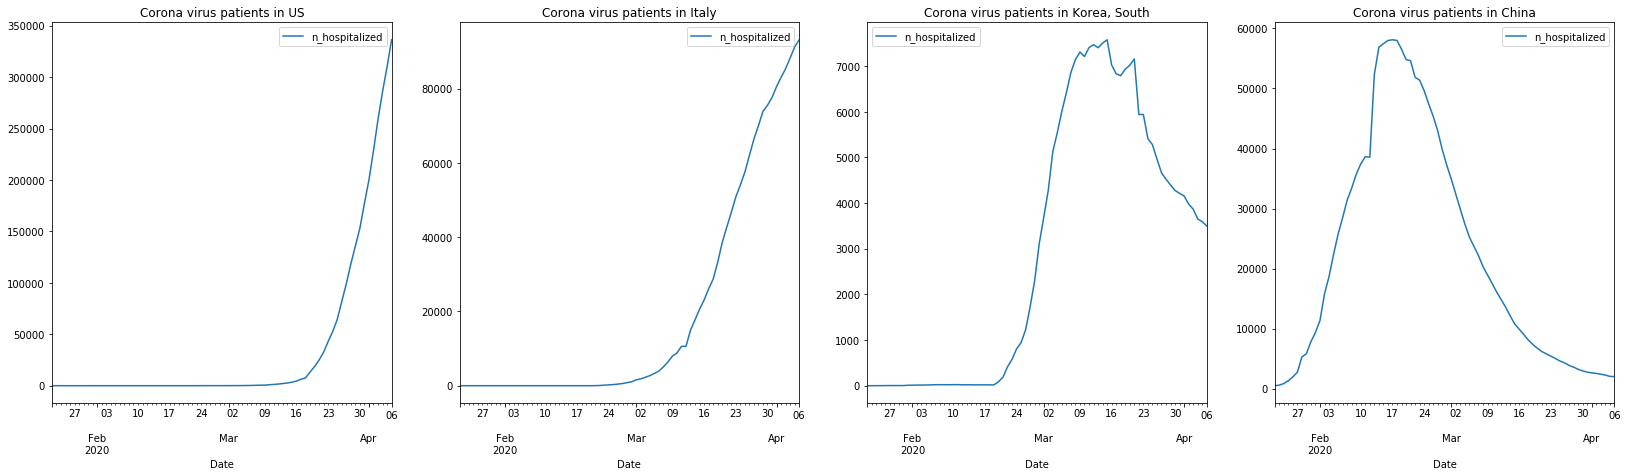

In [20]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 4, figsize=(28, 7))
for i in range(4):
    country = countries[i]
    ax[i].set_title('Corona virus patients in %s' % country)
    df[df.Country == country][['Date', 'n_hospitalized']].plot(ax=ax[i], x='Date')

In [10]:
#The dataset has a cumulative number for each county. Let’s calculate the number of confirmed, recovered and deaths per day for each country.
df.loc[:, 'n_confirmed_per_day'] = df.sort_values('Date').groupby('Country')['Confirmed'].diff().fillna(0).astype(int)
df.loc[:, 'n_recovered_per_day'] = df.sort_values('Date').groupby('Country')['Recovered'].diff().fillna(0).astype(int)
df.loc[:, 'n_deaths_per_day'] = df.sort_values('Date').groupby('Country')['Deaths'].diff().fillna(0).astype(int)

In [11]:
df.loc[:, 'n_hospitalized_per_day'] = df.n_confirmed_per_day -  df.n_recovered_per_day - df.n_deaths_per_day
df[df.Country == "US"].head()

,Date,Country,Confirmed,Recovered,Deaths,n_hospitalized,n_confirmed_per_day,n_recovered_per_day,n_deaths_per_day,n_hospitalized_per_day
53,2020-01-22,US,1,0,0,1,0,0,0,0
237,2020-01-23,US,1,0,0,1,0,0,0,0
421,2020-01-24,US,2,0,0,2,1,0,0,1
606,2020-01-25,US,2,0,0,2,0,0,0,0
788,2020-01-26,US,5,0,0,5,3,0,0,3


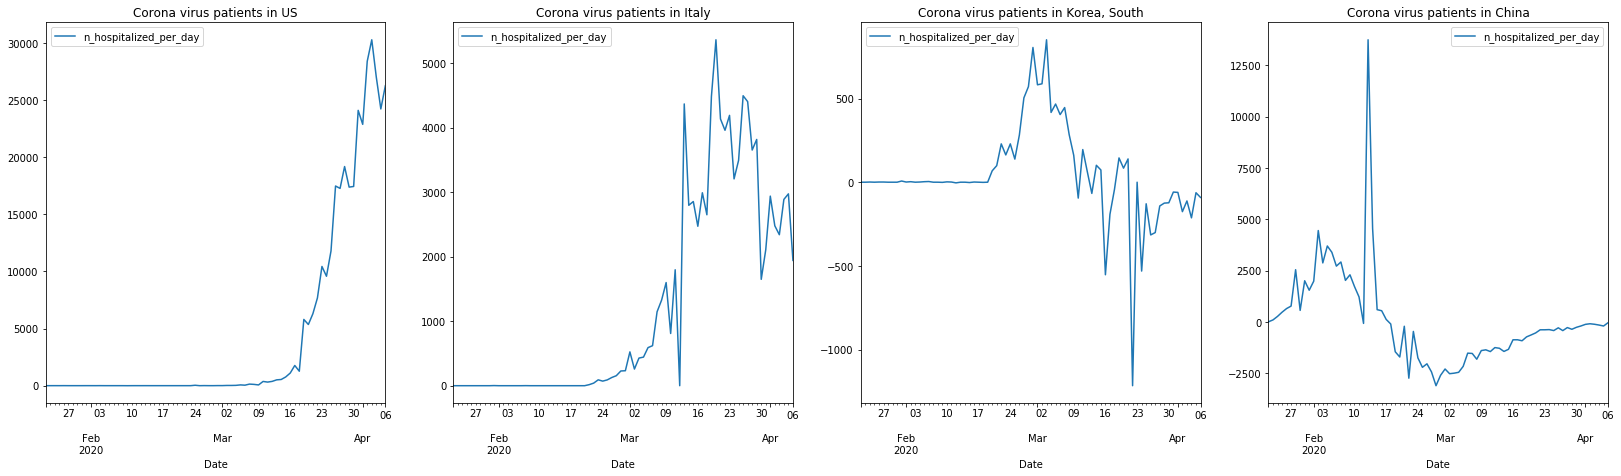

In [12]:
fig, ax = plt.subplots(1, 4, figsize=(28, 7))
countries = ['US', 'Italy', 'Korea, South', 'China']
for i in range(4):
    country = countries[i]
    ax[i].set_title('Corona virus patients in %s' % country)
    df[df.Country == country][['Date', 'n_hospitalized_per_day']].plot(ax=ax[i], x='Date')

In [13]:
##We can observe that the growth of positive coronavirus cases in the US is staggering.
#The pandemic hasn’t reached its heights in the US. The situation in Italy has also an uptrend with a few negative peaks. 
#In South Korea and China, more people are getting over coronavirus than getting sick.

In [17]:
df.head()


,Date,Country,Confirmed,Recovered,Deaths,n_hospitalized,n_confirmed_per_day,n_recovered_per_day,n_deaths_per_day,n_hospitalized_per_day
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,0
1,2020-01-22,Mozambique,0,0,0,0,0,0,0,0
2,2020-01-22,Namibia,0,0,0,0,0,0,0,0
3,2020-01-22,Nepal,0,0,0,0,0,0,0,0
4,2020-01-22,Netherlands,0,0,0,0,0,0,0,0


In [21]:
df.tail()

,Date,Country,Confirmed,Recovered,Deaths,n_hospitalized,n_confirmed_per_day,n_recovered_per_day,n_deaths_per_day,n_hospitalized_per_day
13979,2020-04-06,Gambia,4,2,1,1,0,0,0,0
13980,2020-04-06,Georgia,188,39,2,147,14,3,0,11
13981,2020-04-06,Germany,103374,28700,1810,72864,3251,0,226,3025
13982,2020-04-06,Estonia,1108,62,19,1027,11,0,4,7
13983,2020-04-06,Zimbabwe,10,0,1,9,1,0,0,1


In [23]:
df.iloc[:,'Countries']=df.Country

ValueError: Can only index by location with a [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array]

In [25]:
c_=df.columns.values

In [26]:
c_[0]

'Date'

In [27]:
c_[2]

'Confirmed'

In [28]:
c_[1]

'Country'

In [29]:
c_[1]='Countries'

In [30]:
c_[1]

'Countries'

In [31]:
df.head(1)

,Date,Countries,Confirmed,Recovered,Deaths,n_hospitalized,n_confirmed_per_day,n_recovered_per_day,n_deaths_per_day,n_hospitalized_per_day
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,0
